# Imports

## Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from glob import glob
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [2]:
# Data manipulation
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 30
import math

# Data Visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils, to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from  tensorflow import expand_dims, squeeze

In [4]:
from tensorflow.keras.optimizers import Adam

# Tried a few different versions, this was the best result
custom_adam = Adam(learning_rate=0.0001)

## Data

In [5]:
# Function to make things easier
def import_data(cut_categories=False):
  if cut_categories:
    df = pd.read_pickle('database_final_v4_6emo.pkl')
  else:
    df = pd.read_pickle('database_final_v4.pkl')
  return df

In [ ]:
# Load Data
df = import_data(cut_categories=True)

In [ ]:
df.head(2)

In [ ]:
df.info()

In [ ]:
# Data is now ready
df = df[df['emotion']!='surprised'].reset_index()

In [ ]:
# Encode Labels
lb = LabelEncoder()
y = df['emotion']
y_cat = np_utils.to_categorical(lb.fit_transform(y))

In [ ]:
df.groupby('emotion').count()

,level_0,index,id,wave,mel_spec,fourrier,spec,spectral_centroid,mfcc,chroma_stft,tonnetz,intensity,repetition,actor_gender,actor_age,source
emotion,,,,,,,,,,,,,,,,
angry,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923
disgust,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923
fearful,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923
happy,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923
neutral,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703
sad,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723


# Models

## Model 1: Simple Tonnetz


In [ ]:
# Optional cutting to 4 emotions (need to adjust model)
# df = df[df['emotion']!='disgust']
# df = df[df['emotion']!='fearful'].reset_index()
lb = LabelEncoder()
y = df['emotion']
y_cat = np_utils.to_categorical(lb.fit_transform(y))

In [ ]:
df['tonnetz']

0        [[0.013699955686509828, -0.003631811642639246,...
1        [[-0.11400240548955944, -0.11533106978425169, ...
2        [[-0.06737267803132992, -0.052550179674132794,...
3        [[0.01590668038099245, -0.017033557377502263, ...
4        [[-0.01154996413504892, -0.012310916026523674,...
                               ...                        
11113    [[0.037540806310996766, 0.03995356748174914, 0...
11114    [[0.056195407274964956, 0.04051361656623037, 0...
11115    [[-0.02838156910269496, -0.014462168851763626,...
11116    [[0.03637628281552688, 0.06103719084058169, 0....
11117    [[-0.013825005936069373, 0.009084334940358128,...
Name: tonnetz, Length: 11118, dtype: object

In [ ]:
df['tonnetz'][0][0]

array([ 0.01369996, -0.00363181, -0.04147455, -0.10499756, -0.17078021,
       -0.03738004,  0.25844561,  0.35400744,  0.24523407,  0.12399114,
        0.0783973 ,  0.05442138,  0.04065253,  0.06131205,  0.07765707,
        0.05453042,  0.11420719,  0.18590638,  0.23654868,  0.05278377,
        0.0388999 ,  0.04487734,  0.03817897,  0.01305858, -0.03356193,
       -0.05164649, -0.07058663, -0.11001424, -0.11057896, -0.09728116,
       -0.06174941, -0.01902895, -0.04085201,  0.01717603,  0.08397553,
        0.18559034,  0.17573486,  0.11884329,  0.070574  ,  0.05386441,
        0.06727722,  0.00831661,  0.0757276 , -0.21657144, -0.14130489,
        0.06783514,  0.07678856,  0.00729219, -0.05598293, -0.11163602,
       -0.07541429, -0.05270579, -0.04102154, -0.01581746, -0.0085467 ,
       -0.03317991, -0.14243466, -0.03858346,  0.03363929, -0.00222602,
       -0.10401584,  0.02343112,  0.03209967, -0.00961836, -0.01254906,
       -0.07553634, -0.04100395,  0.01758943,  0.07245177,  0.07

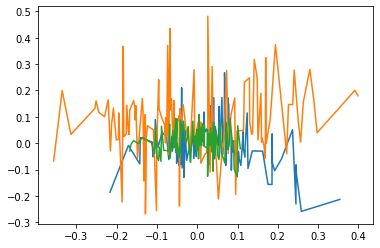

In [ ]:
# Playing around with plots

# fifth
sns.lineplot(x=df['tonnetz'][0][0],y=df['tonnetz'][0][1])
# minor third
sns.lineplot(x=df['tonnetz'][0][2],y=df['tonnetz'][0][3])
# major third green
sns.lineplot(x=df['tonnetz'][0][4],y=df['tonnetz'][0][5])

In [ ]:
# based on the minor third, prediction is that it will be either neutral or a negative emotion
df['emotion'][0]

'fearful'

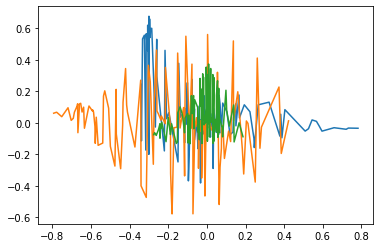

In [ ]:
# fifth
sns.lineplot(x=df['tonnetz'][3560][0],y=df['tonnetz'][3560][1])
# minor third
sns.lineplot(x=df['tonnetz'][3560][2],y=df['tonnetz'][3560][3])
# major third
sns.lineplot(x=df['tonnetz'][3560][4],y=df['tonnetz'][3560][5])

In [ ]:
# based on the minor third, prediction is that it will be either neutral or a negative emotion again
df['emotion'][3560]

'sad'

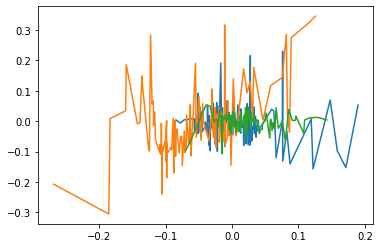

In [ ]:
# fifth
sns.lineplot(x=df['tonnetz'][7151][0],y=df['tonnetz'][7151][1])
# minor third
sns.lineplot(x=df['tonnetz'][7151][2],y=df['tonnetz'][7151][3])
# major third
sns.lineplot(x=df['tonnetz'][7151][4],y=df['tonnetz'][7151][5])

In [ ]:
# based on the minor third, prediction is that it will be either neutral or a negative emotion again
df['emotion'][7151]

'fearful'

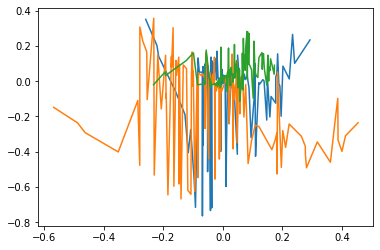

In [ ]:
# fifth
sns.lineplot(x=df['tonnetz'][3000][0],y=df['tonnetz'][3000][1])
# minor third
sns.lineplot(x=df['tonnetz'][3000][2],y=df['tonnetz'][3000][3])
# major third
sns.lineplot(x=df['tonnetz'][3000][4],y=df['tonnetz'][3000][5])

In [ ]:
# based on the minor third, prediction is that it will be either neutral or a negative emotion again
df['emotion'][3000]
#it waswrong, tis neutral

'neutral'

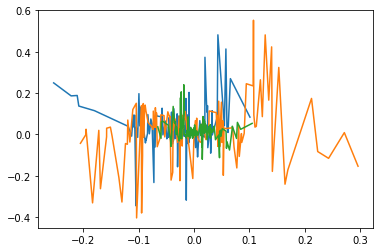

In [ ]:
# fifth
sns.lineplot(x=df['tonnetz'][777][0],y=df['tonnetz'][777][1])
# minor third
sns.lineplot(x=df['tonnetz'][777][2],y=df['tonnetz'][777][3])
# major third
sns.lineplot(x=df['tonnetz'][777][4],y=df['tonnetz'][777][5])

In [ ]:
# based on the minor third, prediction is that it will be either neutral or a negative emotion again
df['emotion'][777]

'angry'

In [ ]:
df.shape

(11118, 16)

In [ ]:
# Creating X by stacking the tonnetz series into a vector
tonnetz_5x = []
tonnetz_5y = []
tonnetz_3mx = []
tonnetz_3my = []
tonnetz_3Mx = []
tonnetz_3My = []
tonnetz = []

for i in range(df.shape[0]):
  tonnetz_5x.append(df['tonnetz'][i][0])
  tonnetz_5y.append(df['tonnetz'][i][1])
  tonnetz_3mx.append(df['tonnetz'][i][2])
  tonnetz_3my.append(df['tonnetz'][i][3])
  tonnetz_3Mx.append(df['tonnetz'][i][4])
  tonnetz_3My.append(df['tonnetz'][i][5])
  tonnetz_5x[i] = np.array(tonnetz_5x[i])
  tonnetz_5y[i] = np.array(tonnetz_5y[i])
  tonnetz_3mx[i] = np.array(tonnetz_3mx[i])
  tonnetz_3my[i] = np.array(tonnetz_3my[i])
  tonnetz_3Mx[i] = np.array(tonnetz_3Mx[i])
  tonnetz_3My[i] = np.array(tonnetz_3My[i])
  tonnetz.append(np.stack((tonnetz_5x[i],tonnetz_5y[i],tonnetz_3mx[i],
                      tonnetz_3my[i],tonnetz_3Mx[i],tonnetz_3My[i])))

In [ ]:
# tranforming everything into an array, aplitting train test and minmax scaling
X = np.array(tonnetz)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30, stratify=y)
scaler = MinMaxScaler()
X_train_mmscaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_mmscaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7782, 6, 127)
(3336, 6, 127)


In [ ]:
from  tensorflow import expand_dims, squeeze

In [ ]:
# Expanding dims to input into model
X_train_mmscaled = expand_dims(X_train_mmscaled,-1)
X_test_mmscaled = expand_dims(X_test_mmscaled,-1)

In [ ]:
print(X_train_mmscaled.shape)
print(X_test_mmscaled.shape)

(7782, 6, 127, 1)
(3336, 6, 127, 1)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Tried a few different versions, this was the best result
custom_adam = Adam(learning_rate=0.0001)

In [ ]:
# Masking 0 values and using conv2d to scan through each X Y pair in tonnetz (see libosa docs)
model = models.Sequential()
model.add(layers.Masking(mask_value=0))
model.add(layers.Conv2D(128, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))
model.add(layers.Conv2D(128, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))
# model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(512, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())

# More dense layers improved model performance 10-20%

model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(6, activation='softmax'))


In [ ]:
model.build((1, 6, 127, 1))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (1, 6, 127, 1)            0         
                                                                 
 conv2d (Conv2D)             (1, 5, 63, 128)           640       
                                                                 
 conv2d_1 (Conv2D)           (1, 4, 31, 128)           65664     
                                                                 
 batch_normalization (BatchN  (1, 4, 31, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (1, 4, 31, 128)           0         
                                                                 
 conv2d_2 (Conv2D)           (1, 3, 15, 256)           131328    
                                                        

In [ ]:
es = EarlyStopping(patience=50, restore_best_weights=True)
history_1 = model.fit(X_train_mmscaled, y_train, validation_split=0.3, epochs=1000, batch_size=64, callbacks=[es])

Epoch 1/1000
86/86 [==============================] - 4s 11ms/step - loss: 1.7915 - accuracy: 0.1717 - val_loss: 1.7915 - val_accuracy: 0.1687
Epoch 2/1000
86/86 [==============================] - 1s 7ms/step - loss: 1.7902 - accuracy: 0.1717 - val_loss: 1.7912 - val_accuracy: 0.1687
Epoch 3/1000
86/86 [==============================] - 1s 7ms/step - loss: 1.7878 - accuracy: 0.1718 - val_loss: 1.7909 - val_accuracy: 0.1687
Epoch 4/1000
86/86 [==============================] - 1s 7ms/step - loss: 1.7805 - accuracy: 0.1783 - val_loss: 1.7879 - val_accuracy: 0.2060
Epoch 5/1000
86/86 [==============================] - 1s 7ms/step - loss: 1.7528 - accuracy: 0.1939 - val_loss: 1.7696 - val_accuracy: 0.2330
Epoch 6/1000
70/86 [=======================>......] - ETA: 0s - loss: 1.7322 - accuracy: 0.2112

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test_mmscaled, y_test)

## Model 2: Tonnetz + PCA (Failure)


I think this one went wrong at a very fundamental leval. Might be interesting to go back and see if it can be processed correctly. I tried to make it so that after reducing the dimensionality to 3 waves, it returned to the original format. I don't think I did it right, but I planned on going back to it at some point. Might hve been a good solution if implemented, but couldn't figure out how to do DL with it, only the original ML.

In [ ]:
from sklearn.decomposition import PCA



In [ ]:
std_scaler = StandardScaler(copy=True)
X_train_stdscaled = std_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_stdscaled = std_scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
pca = PCA()

In [ ]:
X_train_PCA = pca.fit_transform(X_train_stdscaled.reshape(-1, X_train_stdscaled.shape[-1])).reshape(X_train.shape)
X_train_PCa_cut = X_train_PCA[:,:4,:]


In [ ]:
X_test_PCA = pca.transform(X_test_stdscaled.reshape(-1, X_test_stdscaled.shape[-1])).reshape(X_test.shape)
X_test_PCA_cut = X_test_PCA[:,:4,:]


In [ ]:
X_test_PCA.shape

(3336, 6, 127)

In [ ]:
X_train_PCA.shape

(7782, 6, 127)

In [ ]:
X_train_PCA_input = pca.inverse_transform(X_train_PCa_cut)
X_test_PCA_input = pca.inverse_transform(X_test_PCA_cut)

In [ ]:
X_train_PCA_input = expand_dims(X_train_PCA_input,-1)
X_test_PCA_input = expand_dims(X_test_PCA_cut,-1)

In [ ]:
model2 = models.Sequential()
model2.add(layers.Masking(mask_value=0))
model2.add(layers.Conv2D(128, kernel_size=(1,1), strides=(1,1), padding='valid', activation = "relu"))
model2.add(layers.Conv2D(128, kernel_size=(1,1), strides=(1,1), padding='valid', activation = "relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

model2.add(layers.Conv2D(256, kernel_size=(1,1), strides=(1,1), padding='valid', activation = "relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Conv2D(256, kernel_size=(1,1), strides=(1,1), padding='valid', activation = "relu"))
model2.add(layers.Dropout(0.5))
model2.add(layers.Conv2D(512, kernel_size=(1,1), strides=(1,1), padding='valid', activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Flatten())

model2.add(layers.Dense(200, activation='relu'))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(100, activation='relu'))

model2.add(layers.Dense(200, activation='relu'))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(100, activation='relu'))

model2.add(layers.Dense(6, activation='softmax'))


In [ ]:
model2.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=["accuracy"])

In [ ]:
X_train_PCA_input.shape

TensorShape([7782, 4, 127, 1])

In [ ]:
es = EarlyStopping(patience=30, restore_best_weights=True)
history_2 = model2.fit(X_train_PCA_input, y_train, validation_split=0.3, epochs=1000, batch_size=64, callbacks=[es])

Epoch 1/1000
86/86 [==============================] - 3s 20ms/step - loss: 2.1557 - accuracy: 0.1702 - val_loss: 1.7912 - val_accuracy: 0.1760
Epoch 2/1000
86/86 [==============================] - 1s 15ms/step - loss: 1.7902 - accuracy: 0.1755 - val_loss: 1.7909 - val_accuracy: 0.1760
Epoch 3/1000
86/86 [==============================] - 1s 15ms/step - loss: 1.7852 - accuracy: 0.1819 - val_loss: 1.7907 - val_accuracy: 0.1760
Epoch 4/1000
86/86 [==============================] - 1s 15ms/step - loss: 1.7712 - accuracy: 0.1942 - val_loss: 1.7851 - val_accuracy: 0.2385
Epoch 5/1000
86/86 [==============================] - 1s 15ms/step - loss: 1.7426 - accuracy: 0.2231 - val_loss: 1.7570 - val_accuracy: 0.2771
Epoch 6/1000
86/86 [==============================] - 1s 15ms/step - loss: 1.7176 - accuracy: 0.2376 - val_loss: 1.7240 - val_accuracy: 0.2912
Epoch 7/1000
86/86 [==============================] - 1s 15ms/step - loss: 1.7021 - accuracy: 0.2541 - val_loss: 1.6776 - val_accuracy: 0.3032

KeyboardInterrupt: ignored

In [ ]:
model2.evaluate(X_test_PCA_input, y_test)

## Model 3 Chroma stacked

In [ ]:
# Attempted to stack all compatible features, failed and went to chroma

In [ ]:
df.columns

Index(['index', 'id', 'wave', 'mel_spec', 'fourrier', 'spec',
       'spectral_centroid', 'mfcc', 'chroma_stft', 'tonnetz', 'emotion',
       'intensity', 'repetition', 'actor_gender', 'actor_age', 'source'],
      dtype='object')

In [ ]:
columns = df.drop(['id', 'index','emotion','intensity','repetition','actor_gender','actor_age','source'], axis=1).columns

In [ ]:
columns

Index(['wave', 'mel_spec', 'fourrier', 'spec', 'spectral_centroid', 'mfcc',
       'chroma_stft', 'tonnetz'],
      dtype='object')

In [ ]:
for i in columns:
  print(f'The len of {i} is {len(df[i][0])}')

The len of wave is 65000
The len of mel_spec is 256
The len of fourrier is 1025
The len of spec is 256
The len of spectral_centroid is 1
The len of mfcc is 127
The len of chroma_stft is 12
The len of tonnetz is 6


In [ ]:
len(df['chroma_stft' ][0][0])

127

In [ ]:
for i in range(12):
  print(f'chroma_{i} = []')

chroma_0 = []
chroma_1 = []
chroma_2 = []
chroma_3 = []
chroma_4 = []
chroma_5 = []
chroma_6 = []
chroma_7 = []
chroma_8 = []
chroma_9 = []
chroma_10 = []
chroma_11 = []


In [ ]:
for i in range(12):
  print(f'chroma_{i}, ')

chroma_0, 
chroma_1, 
chroma_2, 
chroma_3, 
chroma_4, 
chroma_5, 
chroma_6, 
chroma_7, 
chroma_8, 
chroma_9, 
chroma_10, 
chroma_11, 


In [ ]:
for i in range(12):
  print(f'chroma[{i}][i], ')

chroma[0][i], 
chroma[1][i], 
chroma[2][i], 
chroma[3][i], 
chroma[4][i], 
chroma[5][i], 
chroma[6][i], 
chroma[7][i], 
chroma[8][i], 
chroma[9][i], 
chroma[10][i], 
chroma[11][i], 


In [ ]:
tonnetz_5x = []
tonnetz_5y = []
tonnetz_3mx = []
tonnetz_3my = []
tonnetz_3Mx = []
tonnetz_3My = []
chroma_0 = []
chroma_1 = []
chroma_2 = []
chroma_3 = []
chroma_4 = []
chroma_5 = []
chroma_6 = []
chroma_7 = []
chroma_8 = []
chroma_9 = []
chroma_10 = []
chroma_11 = []
chroma = [chroma_0, 
chroma_1, 
chroma_2, 
chroma_3, 
chroma_4, 
chroma_5, 
chroma_6, 
chroma_7, 
chroma_8, 
chroma_9, 
chroma_10, 
chroma_11]
mfcc = []
total = []

for i in range(df.shape[0]):
  # tonnetz_5x.append(df['tonnetz'][i][0])
  # tonnetz_5y.append(df['tonnetz'][i][1])
  # tonnetz_3mx.append(df['tonnetz'][i][2])
  # tonnetz_3my.append(df['tonnetz'][i][3])
  # tonnetz_3Mx.append(df['tonnetz'][i][4])
  # tonnetz_3My.append(df['tonnetz'][i][5])
  for index, j in enumerate(chroma):
    j.append(df['chroma_stft'][i][index])
  # mfcc.append(df['mfcc'][i])
  for k in range(12):
    chroma[k][i] = np.array(chroma[k][i])
  # tonnetz_5x[i] = np.array(tonnetz_5x[i])
  # tonnetz_5y[i] = np.array(tonnetz_5y[i])
  # tonnetz_3mx[i] = np.array(tonnetz_3mx[i])
  # tonnetz_3my[i] = np.array(tonnetz_3my[i])
  # tonnetz_3Mx[i] = np.array(tonnetz_3Mx[i])
  # tonnetz_3My[i] = np.array(tonnetz_3My[i])
  # mfcc[i] = np.array(mfcc[i])
  total.append(np.stack(( chroma[1][i], chroma[2][i], chroma[3][i], chroma[4][i], 
                      chroma[5][i], chroma[6][i], chroma[7][i], chroma[8][i], 
                      chroma[9][i], chroma[10][i], chroma[11][i])))

In [ ]:
X = np.array(total)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30, stratify=y)

In [ ]:
scaler = MinMaxScaler()
X_train_mmscaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_mmscaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

X_train_mmscaled = expand_dims(X_train_mmscaled,-1)
X_test_mmscaled = expand_dims(X_test_mmscaled,-1)

In [ ]:
model3 = models.Sequential()
model3.add(layers.Masking(mask_value=0))
model3.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model3.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

model3.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
# model.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))
model3.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model3.add(layers.Dropout(0.5))
model3.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model3.add(layers.Flatten())

model3.add(layers.Dense(200, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(100, activation='relu'))

model3.add(layers.Dense(200, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(100, activation='relu'))

model3.add(layers.Dense(6, activation='softmax'))


In [ ]:
model3.build((1, 11, 127, 1))

In [ ]:
model3.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=["accuracy"])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (1, 11, 127, 1)           0         
                                                                 
 conv1d (Conv1D)             (1, 11, 122, 128)         896       
                                                                 
 conv1d_1 (Conv1D)           (1, 11, 117, 128)         98432     
                                                                 
 batch_normalization_3 (Batc  (1, 11, 117, 128)        512       
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (1, 11, 117, 128)         0         
                                                                 
 conv1d_2 (Conv1D)           (1, 11, 112, 256)         196864    
                                                      

In [ ]:
es = EarlyStopping(patience=20, restore_best_weights=True)
history_3 = model3.fit(X_train_mmscaled, y_train, validation_split=0.3, epochs=1000, batch_size=64, callbacks=[es])

Epoch 1/1000
86/86 [==============================] - 5s 35ms/step - loss: 1.9155 - accuracy: 0.1718 - val_loss: 1.7914 - val_accuracy: 0.1679
Epoch 2/1000
86/86 [==============================] - 2s 27ms/step - loss: 1.7911 - accuracy: 0.1751 - val_loss: 1.7911 - val_accuracy: 0.1679
Epoch 3/1000
86/86 [==============================] - 2s 26ms/step - loss: 1.7908 - accuracy: 0.1751 - val_loss: 1.7910 - val_accuracy: 0.1679
Epoch 4/1000
86/86 [==============================] - 2s 26ms/step - loss: 1.7905 - accuracy: 0.1751 - val_loss: 1.7908 - val_accuracy: 0.1679
Epoch 5/1000
86/86 [==============================] - 2s 25ms/step - loss: 1.7906 - accuracy: 0.1751 - val_loss: 1.7908 - val_accuracy: 0.1679
Epoch 6/1000
86/86 [==============================] - 2s 27ms/step - loss: 1.7904 - accuracy: 0.1751 - val_loss: 1.7908 - val_accuracy: 0.1679
Epoch 7/1000
86/86 [==============================] - 2s 26ms/step - loss: 1.7904 - accuracy: 0.1748 - val_loss: 1.7907 - val_accuracy: 0.1679

In [ ]:
model3.evaluate(X_test_mmscaled, y_test)

105/105 [==============================] - 1s 6ms/step - loss: 1.5483 - accuracy: 0.3216


[1.5483160018920898, 0.3216426968574524]

## Model 4: Tonnetz 1D

In [ ]:
tonnetz_5x = []
tonnetz_5y = []
tonnetz_3mx = []
tonnetz_3my = []
tonnetz_3Mx = []
tonnetz_3My = []
tonnetz = []

for i in range(df.shape[0]):
  tonnetz_5x.append(df['tonnetz'][i][0])
  tonnetz_5y.append(df['tonnetz'][i][1])
  tonnetz_3mx.append(df['tonnetz'][i][2])
  tonnetz_3my.append(df['tonnetz'][i][3])
  tonnetz_3Mx.append(df['tonnetz'][i][4])
  tonnetz_3My.append(df['tonnetz'][i][5])
  tonnetz_5x[i] = np.array(tonnetz_5x[i])
  tonnetz_5y[i] = np.array(tonnetz_5y[i])
  tonnetz_3mx[i] = np.array(tonnetz_3mx[i])
  tonnetz_3my[i] = np.array(tonnetz_3my[i])
  tonnetz_3Mx[i] = np.array(tonnetz_3Mx[i])
  tonnetz_3My[i] = np.array(tonnetz_3My[i])
  tonnetz.append(np.stack((tonnetz_5x[i],tonnetz_5y[i],tonnetz_3mx[i],
                      tonnetz_3my[i],tonnetz_3Mx[i],tonnetz_3My[i])))

In [ ]:
X = np.array(tonnetz)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30, stratify=y)
scaler = MinMaxScaler()
X_train_mmscaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_mmscaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
X_train_mmscaled = expand_dims(X_train_mmscaled,-1)
X_test_mmscaled = expand_dims(X_test_mmscaled,-1)

In [ ]:
model4 = models.Sequential()
model4.add(layers.Masking(mask_value=0))
model4.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model4.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.5))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

model4.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
# model.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.5))
model4.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model4.add(layers.Dropout(0.5))
model4.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model4.add(layers.Flatten())

model4.add(layers.Dense(200, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(100, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(100, activation='relu'))

model4.add(layers.Dense(200, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(100, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(100, activation='relu'))

model4.add(layers.Dense(6, activation='softmax'))


In [ ]:
model4.build((1, 6, 127, 1))

In [ ]:
model4.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=["accuracy"])

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_3 (Masking)         (1, 6, 127, 1)            0         
                                                                 
 conv1d_5 (Conv1D)           (1, 6, 122, 128)          896       
                                                                 
 conv1d_6 (Conv1D)           (1, 6, 117, 128)          98432     
                                                                 
 batch_normalization_4 (Batc  (1, 6, 117, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_17 (Dropout)        (1, 6, 117, 128)          0         
                                                                 
 conv1d_7 (Conv1D)           (1, 6, 112, 256)          196864    
                                                      

In [ ]:
es = EarlyStopping(patience=50, restore_best_weights=True)
history_4 = model4.fit(X_train_mmscaled, y_train, validation_split=0.3, epochs=1000, batch_size=64, callbacks=[es])

Epoch 1/1000
86/86 [==============================] - 4s 25ms/step - loss: 1.8017 - accuracy: 0.1700 - val_loss: 1.7921 - val_accuracy: 0.1623
Epoch 2/1000
86/86 [==============================] - 1s 17ms/step - loss: 1.7686 - accuracy: 0.1959 - val_loss: 1.7919 - val_accuracy: 0.1692
Epoch 3/1000
86/86 [==============================] - 1s 16ms/step - loss: 1.7399 - accuracy: 0.2210 - val_loss: 1.7921 - val_accuracy: 0.1692
Epoch 4/1000
86/86 [==============================] - 1s 16ms/step - loss: 1.7181 - accuracy: 0.2240 - val_loss: 1.7928 - val_accuracy: 0.1752
Epoch 5/1000
86/86 [==============================] - 1s 16ms/step - loss: 1.7055 - accuracy: 0.2422 - val_loss: 1.7938 - val_accuracy: 0.1752
Epoch 6/1000
86/86 [==============================] - 1s 16ms/step - loss: 1.6954 - accuracy: 0.2631 - val_loss: 1.7951 - val_accuracy: 0.1752
Epoch 7/1000
86/86 [==============================] - 1s 17ms/step - loss: 1.6863 - accuracy: 0.2644 - val_loss: 1.7820 - val_accuracy: 0.1949

In [ ]:
model4.evaluate(X_test_mmscaled, y_test)

105/105 [==============================] - 1s 4ms/step - loss: 1.5736 - accuracy: 0.3429


[1.5735838413238525, 0.34292566776275635]

## Model 5: Mfcc

In [ ]:
tonnetz_5x = []
tonnetz_5y = []
tonnetz_3mx = []
tonnetz_3my = []
tonnetz_3Mx = []
tonnetz_3My = []
chroma_0 = []
chroma_1 = []
chroma_2 = []
chroma_3 = []
chroma_4 = []
chroma_5 = []
chroma_6 = []
chroma_7 = []
chroma_8 = []
chroma_9 = []
chroma_10 = []
chroma_11 = []
chroma = [chroma_0, 
chroma_1, 
chroma_2, 
chroma_3, 
chroma_4, 
chroma_5, 
chroma_6, 
chroma_7, 
chroma_8, 
chroma_9, 
chroma_10, 
chroma_11]
mfcc = []
total = []

for i in range(df.shape[0]):
  mfcc.append(df['mfcc'][i])
  mfcc[i] = np.array(mfcc[i])

In [ ]:
total = np.array(mfcc)

In [ ]:
X = np.array(total)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30, stratify=y)
scaler = MinMaxScaler()
X_train_mmscaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_mmscaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
X_train_mmscaled = expand_dims(X_train_mmscaled,-1)
X_test_mmscaled = expand_dims(X_test_mmscaled,-1)

In [ ]:
model5 = models.Sequential()
model5.add(layers.Masking(mask_value=0))
model5.add(layers.Conv1D(128, kernel_size=2, strides=1, padding='valid', activation = "relu"))
model5.add(layers.Conv1D(128, kernel_size=2, strides=1, padding='valid', activation = "relu"))
# model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.5))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

model5.add(layers.Conv1D(256, kernel_size=2, strides=1, padding='valid', activation = "relu"))
# model.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.5))
model5.add(layers.Conv1D(256, kernel_size=2, strides=1, padding='valid', activation = "relu"))
model5.add(layers.Dropout(0.5))
model5.add(layers.Conv1D(256, kernel_size=2, strides=1, padding='valid', activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model5.add(layers.Flatten())

model5.add(layers.Dense(200, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(100, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(100, activation='relu'))

model5.add(layers.Dense(200, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(100, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(100, activation='relu'))

model5.add(layers.Dense(6, activation='softmax'))


In [ ]:
model5.build((1, 127, 1, 1))

ValueError: ignored

In [ ]:
model5.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=["accuracy"])

In [ ]:
model5.summary()

ValueError: ignored

In [ ]:
es = EarlyStopping(patience=50, restore_best_weights=True)
history_5 = model5.fit(X_train_mmscaled, y_train, validation_split=0.3, epochs=1000, batch_size=64, callbacks=[es])

Epoch 1/1000
86/86 [==============================] - 2s 12ms/step - loss: 1.7924 - accuracy: 0.1674 - val_loss: 1.7915 - val_accuracy: 0.1636
Epoch 2/1000
86/86 [==============================] - 1s 8ms/step - loss: 1.7899 - accuracy: 0.1786 - val_loss: 1.7917 - val_accuracy: 0.1636
Epoch 3/1000
86/86 [==============================] - 1s 8ms/step - loss: 1.7904 - accuracy: 0.1695 - val_loss: 1.7914 - val_accuracy: 0.1636
Epoch 4/1000
86/86 [==============================] - 1s 7ms/step - loss: 1.7906 - accuracy: 0.1671 - val_loss: 1.7915 - val_accuracy: 0.1636
Epoch 5/1000
86/86 [==============================] - 1s 7ms/step - loss: 1.7899 - accuracy: 0.1786 - val_loss: 1.7915 - val_accuracy: 0.1636
Epoch 6/1000
86/86 [==============================] - 1s 7ms/step - loss: 1.7903 - accuracy: 0.1766 - val_loss: 1.7916 - val_accuracy: 0.1636
Epoch 7/1000
86/86 [==============================] - 1s 7ms/step - loss: 1.7902 - accuracy: 0.1792 - val_loss: 1.7917 - val_accuracy: 0.1636
Epoch

In [ ]:
model5.evaluate(X_test_mmscaled, y_test)

105/105 [==============================] - 0s 3ms/step - loss: 1.7904 - accuracy: 0.1730


[1.7903729677200317, 0.17296163737773895]

## Model 6 Wave

This one has to be run separately, it takes up too much memory

Impossible to run, abort

In [ ]:
wave = []

for i in range(df.shape[0]):
  wave.append(df['wave'][i])
  wave[i] = np.array(wave[i])

In [ ]:
total = np.array(wave)

In [ ]:
X = np.array(total)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30, stratify=y)
scaler = MinMaxScaler()
X_train_mmscaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_mmscaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
X_train_mmscaled = expand_dims(X_train_mmscaled,-1)
X_test_mmscaled = expand_dims(X_test_mmscaled,-1)

In [ ]:
model6 = models.Sequential()
model6.add(layers.Masking(mask_value=0))
model6.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model6.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
# model6.add(layers.BatchNormalization())
model6.add(layers.Dropout(0.5))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

model6.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
# model.add(layers.BatchNormalization())
model6.add(layers.Dropout(0.5))
model6.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model6.add(layers.Dropout(0.5))
model6.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model6.add(layers.Flatten())

model6.add(layers.Dense(200, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(100, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(100, activation='relu'))

model6.add(layers.Dense(200, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(100, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(100, activation='relu'))

model6.add(layers.Dense(6, activation='softmax'))


In [ ]:
# model6.build((1, 1, 65000, 1))

In [ ]:
model6.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=["accuracy"])

In [ ]:
# model6.summary()

ValueError: ignored

In [ ]:
# es = EarlyStopping(patience=30, restore_best_weights=True)
# history_6 = model6.fit(X_train_mmscaled, y_train, validation_split=0.3, epochs=1000, batch_size=32, callbacks=[es])

Epoch 1/1000


ResourceExhaustedError: ignored

In [ ]:
model6.evaluate(X_test_mmscaled, y_test)

## Model 7 Mel Spec

In [ ]:
df.columns

In [ ]:
mel_spec = []

for i in range(df.shape[0]):
  mel_spec.append(df['mel_spec'][i])
  mel_spec[i] = np.array(mel_spec[i])

In [ ]:
total = np.array(mel_spec)

In [ ]:
X = np.array(total)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30, stratify=y)
scaler = MinMaxScaler()
X_train_mmscaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_mmscaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
X_train_mmscaled = expand_dims(X_train_mmscaled,-1)
X_test_mmscaled = expand_dims(X_test_mmscaled,-1)

In [ ]:
X_train_mmscaled.shape

In [ ]:
model7 = models.Sequential()
model7.add(layers.Masking(mask_value=0))
model7.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model7.add(layers.Dropout(0.5))
model7.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
# model7.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.5))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

model7.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
# model.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.5))
model7.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model7.add(layers.Dropout(0.5))
model7.add(layers.Conv1D(256, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model7.add(layers.Dropout(0.5))
model7.add(layers.Conv1D(128, kernel_size=6, strides=1, padding='valid', activation = "relu"))
model7.add(layers.Dropout(0.5))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model7.add(layers.Flatten())

model7.add(layers.Dense(50, activation='relu'))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(100, activation='relu'))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(100, activation='relu'))
model7.add(layers.Dropout(0.5))

# model7.add(layers.Dense(200, activation='relu'))
# model7.add(layers.Dropout(0.5))
# model7.add(layers.Dense(100, activation='relu'))
# model7.add(layers.Dropout(0.5))
# model7.add(layers.Dense(100, activation='relu'))

model7.add(layers.Dense(6, activation='softmax'))


In [ ]:
model7.build((1, 256, 127, 1))

In [ ]:
model7.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=["accuracy"])

In [ ]:
model7.summary()

In [ ]:
es = EarlyStopping(patience=30, restore_best_weights=True)
history_7 = model7.fit(X_train_mmscaled, y_train, validation_split=0.3, epochs=1000, batch_size=32, callbacks=[es])

In [ ]:
model7.evaluate(X_test_mmscaled, y_test)

In [ ]:
X_train_mmscaled_LSTM = expand_dims(X_train_mmscaled,-1)
X_test_mmscaled_LSTM = expand_dims(X_test_mmscaled,-1)

In [ ]:
# Masking 0 values and using conv2d to scan through each X Y pair in tonnetz (see libosa docs)
model = models.Sequential()
model.add(layers.Masking(mask_value=0))
model.add(layers.ConvLSTM2D(128, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))
model.add(layers.ConvLSTM2D(128, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(layers.ConvLSTM2D(256, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))
# model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.ConvLSTM2D(256, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))
model.add(layers.Dropout(0.3))
# model.add(layers.Conv2D(512, kernel_size=(2,2), strides=(1,2), padding='valid', activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())

# More dense layers improved model performance 10-20%

model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
## model.add(layers.Dropout(0.3))
# model.add(layers.Dense(50, activation='relu'))

model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(6, activation='softmax'))


In [ ]:
model.build((1, 256, 127, 1,1))

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tried a few different versions, this was the best result
custom_adam = Adam(learning_rate=0.00001)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
es = EarlyStopping(patience=30, restore_best_weights=True)
history_8 = model.fit(X_train_mmscaled_LSTM, y_train, validation_split=0.3, epochs=1000, batch_size=32, callbacks=[es])

In [ ]:
model.evaluate(X_test_mmscaled_LSTM, y_test)

## Model 8: LSTM Structure

- one convolutional layer, 
- one batch normalization (BN) layer, 
- one exponential linear unit
- one max-pooling layer,

In [ ]:
X_mel = np.array(df["mel_spec"].values.tolist())

In [ ]:
total = X_mel

In [ ]:
X = np.array(total)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30, stratify=y)
scaler = MinMaxScaler()
X_train_mmscaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_mmscaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
X_train_mmscaled = expand_dims(X_train_mmscaled,-1)
X_test_mmscaled = expand_dims(X_test_mmscaled,-1)

In [ ]:
# X_train_mmscaled = expand_dims(X_train_mmscaled,-1)
# X_test_mmscaled = expand_dims(X_test_mmscaled,-1)

In [ ]:
# Masking 0 values and using conv2d to scan through each X Y pair in tonnetz (see libosa docs)
model8 = models.Sequential()


model8.add(layers.Masking(mask_value=0))

model8.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation = "relu"))
model8.add(layers.BatchNormalization())
model8.add(layers.ELU())
model8.add(layers.MaxPooling2D(pool_size=(4,4),strides=(1,1),padding='same'))

model8.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation = "relu"))
model8.add(layers.BatchNormalization())
model8.add(layers.ELU())
model8.add(layers.MaxPooling2D(pool_size=(4,4),strides=(1,1),padding='same'))

model8.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation = "relu"))
model8.add(layers.BatchNormalization())
model8.add(layers.ELU())
model8.add(layers.MaxPooling2D(pool_size=(4,4),strides=(1,1),padding='same'))

model8.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation = "relu"))
model8.add(layers.BatchNormalization())
model8.add(layers.ELU())
model8.add(layers.MaxPooling2D(pool_size=(4,4),strides=(1,1),padding='same'))

model8.add(layers.Reshape(( 1, 128, 1,1)))
model8.add(layers.ConvLSTM2D(256, kernel_size=(2,2), strides=(1,1), padding='same', activation = "relu"))
model8.add(layers.ConvLSTM2D(256, kernel_size=(2,2), strides=(1,1), padding='same', activation = "relu"))

model8.add(layers.Flatten())

# More dense layers improved model performance 10-20%
model8.add(layers.Dense(50, activation='relu'))
model8.add(layers.Dense(30, activation='relu'))

model8.add(layers.Dense(6, activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import Adam

custom_adam = Adam(learning_rate=0.00005)

In [ ]:
# model8.compile(loss="categorical_crossentropy", optimizer=custom_adam, metrics=[["accuracy"]])

In [ ]:
model8.compile(loss="categorical_crossentropy", optimizer='adagrad', metrics=[["accuracy"]])

In [ ]:
es = EarlyStopping(patience=30, restore_best_weights=True)
history_8 = model8.fit(X_train_mmscaled, y_train, validation_split=0.3, epochs=1000, batch_size=32, callbacks=[es])

Epoch 1/1000
171/171 [==============================] - 27s 87ms/step - loss: 1.7842 - accuracy: 0.2220 - val_loss: 1.7916 - val_accuracy: 0.1679
Epoch 2/1000
171/171 [==============================] - 13s 79ms/step - loss: 1.7693 - accuracy: 0.2216 - val_loss: 1.7911 - val_accuracy: 0.1717
Epoch 3/1000
171/171 [==============================] - 14s 79ms/step - loss: 1.7547 - accuracy: 0.2243 - val_loss: 1.7842 - val_accuracy: 0.1940
Epoch 4/1000
171/171 [==============================] - 14s 79ms/step - loss: 1.7475 - accuracy: 0.2333 - val_loss: 1.7663 - val_accuracy: 0.1961
Epoch 5/1000
171/171 [==============================] - 13s 79ms/step - loss: 1.7416 - accuracy: 0.2267 - val_loss: 1.7560 - val_accuracy: 0.2120
Epoch 6/1000
171/171 [==============================] - 13s 78ms/step - loss: 1.7410 - accuracy: 0.2256 - val_loss: 1.7527 - val_accuracy: 0.2116
Epoch 7/1000
171/171 [==============================] - 13s 78ms/step - loss: 1.7369 - accuracy: 0.2293 - val_loss: 1.7499 -

KeyboardInterrupt: ignored

In [ ]:
model8.evaluate(X_test_mmscaled, y_test)